In [1]:
import tensorflow as tf

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [3]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [20]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
import argparse,os
parser=argparse.ArgumentParser()
parser.add_argument('lr', action="store",type=float)
parser.add_argument('batch_size', action="store",type=int)
parser.add_argument('init', action="store",type=int)
parser.add_argument('file',type=file)
save_path=os.path.abspath(args.file.name)

In [5]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 92s 1us/step


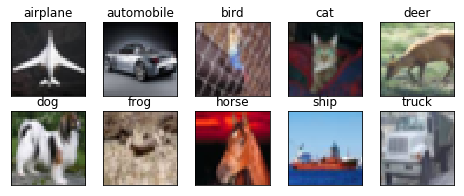

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [21]:
model_path = './vamshi.h5'
callbacks = [ EarlyStopping(monitor='val_acc',patience=10,mode='max',verbose=1), ModelCheckpoint(model_path,monitor='va_acc',save_best_only=True,mode='max',verbose=0)]

In [7]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [9]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(3, 32, 32..., padding="same")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 49s 971us/step - loss: 1.5535 - acc: 0.4320 - val_loss: 1.2013 - val_acc: 0.5671
Epoch 2/20
  120/50000 [..............................] - ETA: 42s - loss: 1.3066 - acc: 0.5417

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks.py:435: RuntimeWarning: Can save best model only with va_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


50000/50000 [==============================] - 46s 916us/step - loss: 1.1158 - acc: 0.6013 - val_loss: 1.0324 - val_acc: 0.6394
Epoch 3/20
50000/50000 [==============================] - 46s 916us/step - loss: 0.9455 - acc: 0.6669 - val_loss: 0.9282 - val_acc: 0.6765
Epoch 4/20
50000/50000 [==============================] - 46s 919us/step - loss: 0.8402 - acc: 0.7055 - val_loss: 0.8774 - val_acc: 0.6968
Epoch 5/20
50000/50000 [==============================] - 46s 914us/step - loss: 0.7574 - acc: 0.7356 - val_loss: 0.8052 - val_acc: 0.7181
Epoch 6/20
50000/50000 [==============================] - 46s 915us/step - loss: 0.6805 - acc: 0.7622 - val_loss: 0.7759 - val_acc: 0.7331
Epoch 7/20
50000/50000 [==============================] - 46s 913us/step - loss: 0.6232 - acc: 0.7825 - val_loss: 0.7446 - val_acc: 0.7474
Epoch 8/20
50000/50000 [==============================] - 46s 915us/step - loss: 0.5758 - acc: 0.8004 - val_loss: 0.7843 - val_acc: 0.7482
Epoch 9/20
50000/50000 [==============

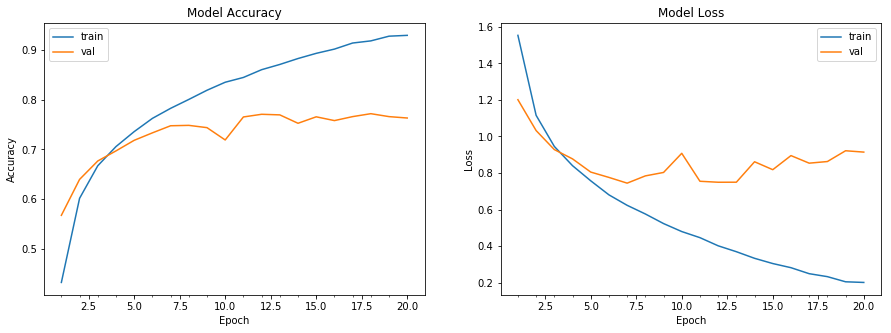

Model took 920.01 seconds to train
Accuracy on test data is: 76.30


In [23]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(256, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=120, nb_epoch=20, 
                       validation_data = (test_features, test_labels), shuffle=True,
                       callbacks=callbacks)
end = time.time()
# plot model history
plot_model_history(model_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=0, steps_per_epoch=416, epochs=5)`
  if sys.path[0] == '':


Model took 223.02 seconds to train


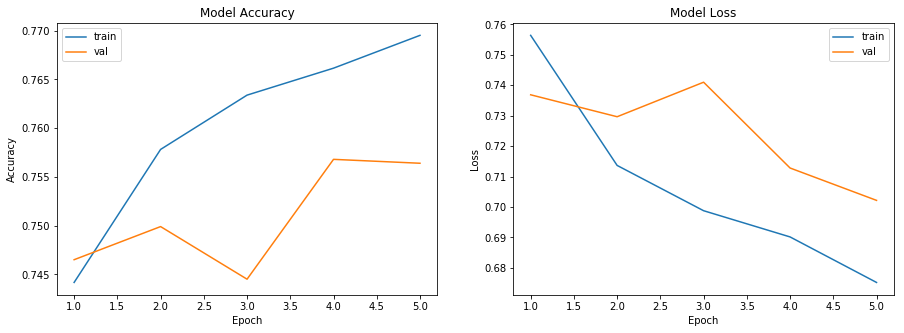

Accuracy on test data is: 75.64


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 120),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels), verbose=0)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
# plo model history
plot_model_history(model_info)
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 32, 32)        1792      
_________________________________________________________________
activation_13 (Activation)   (None, 64, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 16, 16)       73856     
_________________________________________________________________
activation_14 (Activation)   (None, 128, 16, 16)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 8, 8)         295168    
__________

In [18]:
model.save('Vamshi.h5')

In [19]:
model.save_weights('Vamshi2.h5')